<a href="https://colab.research.google.com/github/EricSiq/Supervised-Machine-Learning-Lab/blob/main/SML_KNearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [10]:
warnings.filterwarnings('ignore')

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

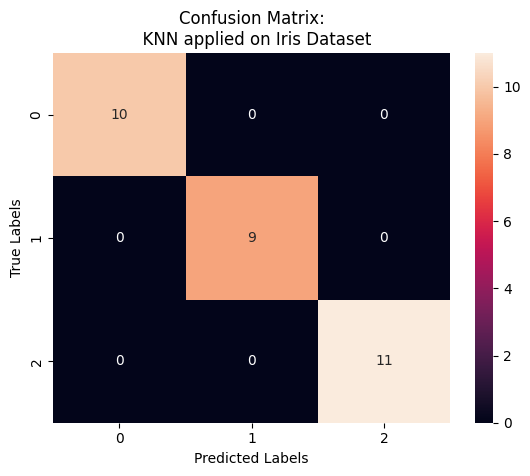

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
cm=confusion_matrix(y_test,knn.predict(x_test))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\n  KNN applied on Iris Dataset")
plt.show()
y_pred=knn.predict(x_test)

In [ ]:



# Initialize and train KNN classifier
  # Using 3 neighbors
knn.fit(x_train, y_train)

# Predict and compute confusion matrix
cm = confusion_matrix(y_test, knn.predict(x_test))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)

